In [2]:
# This was modified from Tensorflow tutorial: https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough
# All appropriate copywrites are retained, use of this material is guided by fair use for teaching
# Some modifications made for course STA 208 by James Sharpnack jsharpna@gmail.com

#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Classification with Tensorflow

## Davis SML: Lecture 9 Part 2

## Prof. James Sharpnack

### Importing and installing tensorflow

- install tensorflow 2.0 with conda (you do not need to install tensorflow-gpu for the course)
- tensorflow, build and execute computational graphs
- tensorflow 1.0 and 2.0 differ mainly by making eager execution default, removing sessions

In [3]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.0.0
Eager execution: True


### Loading data

- tensorflow has many built in utilities for getting data
- you could just as easily use requests/pandas

In [4]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: /home/jsharpna/.keras/datasets/iris_training.csv


In [5]:
train_df = pd.read_csv(train_dataset_fp)
train_dataset = tf.data.Dataset.from_tensor_slices((train_df.values[:,:-1],train_df.values[:,-1]))

### Tensorflow datasets API

- Datasets API loads and readies data for use in stochastic gradient descent type iteration
- the batch size tells it how many samples for the mini-batch
- Dataset has methods to shuffle the data and apply transformations 

In [6]:
batch_size = 32

train_dataset = train_dataset.shuffle(1000)
train_dataset = train_dataset.batch(batch_size)
## sets batchsize and shuffles

In [7]:
X,y = next(iter(train_dataset))
X

<tf.Tensor: id=18, shape=(32, 4), dtype=float64, numpy=
array([[4.6, 3.2, 1.4, 0.2],
       [7.7, 3.8, 6.7, 2.2],
       [6.9, 3.1, 5.1, 2.3],
       [5.5, 3.5, 1.3, 0.2],
       [4.4, 3. , 1.3, 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [6. , 2.2, 5. , 1.5],
       [5.4, 3. , 4.5, 1.5],
       [5.1, 2.5, 3. , 1.1],
       [5.7, 2.9, 4.2, 1.3],
       [5. , 2.3, 3.3, 1. ],
       [5. , 3.2, 1.2, 0.2],
       [6.2, 2.2, 4.5, 1.5],
       [7.4, 2.8, 6.1, 1.9],
       [4.6, 3.1, 1.5, 0.2],
       [6.6, 2.9, 4.6, 1.3],
       [5.7, 2.8, 4.5, 1.3],
       [4.9, 2.5, 4.5, 1.7],
       [4.9, 3.1, 1.5, 0.1],
       [4.8, 3.1, 1.6, 0.2],
       [7. , 3.2, 4.7, 1.4],
       [6.5, 3. , 5.2, 2. ],
       [5.8, 2.7, 5.1, 1.9],
       [4.7, 3.2, 1.3, 0.2],
       [6.4, 3.1, 5.5, 1.8],
       [6.7, 3. , 5. , 1.7],
       [4.9, 3.1, 1.5, 0.1],
       [6.7, 3. , 5.2, 2.3],
       [6.8, 3. , 5.5, 2.1],
       [6.4, 2.8, 5.6, 2.2],
       [5.1, 3.5, 1.4, 0.3],
       [4.8, 3. , 1.4, 0.3]])>

### Keras Model API

- a model is a predictor which builds a computational graph, maintains losses, prepares for optimization
- built from layers which are operations in computational graph
- layers have trainable variables, input and output tensor shapes

In [8]:
train_dataset.element_spec

(TensorSpec(shape=(None, 4), dtype=tf.float64, name=None),
 TensorSpec(shape=(None,), dtype=tf.float64, name=None))

In [9]:
lin_layers = tf.keras.layers.Dense(3)
lin_layers(X)
## Builds and calls the layer


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



<tf.Tensor: id=46, shape=(32, 3), dtype=float32, numpy=
array([[-1.7310516 ,  0.6890017 ,  1.568934  ],
       [-1.2321018 ,  0.07183695,  7.3786564 ],
       [-1.6252513 ,  0.8472171 ,  5.943072  ],
       [-2.1015508 ,  1.0234553 ,  1.7514107 ],
       [-1.656076  ,  0.69046646,  1.5034462 ],
       [-1.9536504 ,  0.68630725,  1.8704369 ],
       [-0.6386379 ,  0.05053979,  6.0700607 ],
       [-1.0703502 ,  0.12206721,  4.7808294 ],
       [-1.3081126 ,  0.6168029 ,  3.630794  ],
       [-1.1271017 ,  0.24579543,  4.753661  ],
       [-0.9981173 ,  0.34248632,  3.995444  ],
       [-1.9195673 ,  0.93282646,  1.5946565 ],
       [-0.9307992 ,  0.40514517,  5.717633  ],
       [-0.8849145 ,  0.13554704,  7.3628073 ],
       [-1.6417408 ,  0.6343436 ,  1.725265  ],
       [-1.1307168 ,  0.2999282 ,  5.587775  ],
       [-0.938839  ,  0.07479072,  5.092637  ],
       [-0.87823534,  0.13021088,  4.8199005 ],
       [-1.6494067 ,  0.65499467,  1.8942974 ],
       [-1.637047  ,  0.6399095 

In [10]:
lin_layers.trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[-0.22390974,  0.31869543,  0.5209168 ],
        [-0.3983484 , -0.03515214, -0.6500874 ],
        [ 0.49475873, -0.5817327 ,  0.9132222 ],
        [-0.5950711 ,  0.7495769 , -0.12757248]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

In [11]:
## create a keras model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(3)
])

In [12]:
## model is callable outputs decision function
logits = model(X)
logits[:5]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



<tf.Tensor: id=79, shape=(5, 3), dtype=float32, numpy=
array([[-3.2300115, -2.0251138,  4.2152457],
       [-2.8198097, -0.7680574,  7.119982 ],
       [-3.2243695, -1.3586173,  6.4011183],
       [-3.971176 , -2.5950513,  4.8970785],
       [-3.0977335, -1.9543148,  4.011347 ]], dtype=float32)>

In [13]:
## Apply softmax to logits to get predicted probabilities
tf.nn.softmax(logits[:5])

<tf.Tensor: id=84, shape=(5, 3), dtype=float32, numpy=
array([[5.8272958e-04, 1.9442296e-03, 9.9747306e-01],
       [4.8196940e-05, 3.7504575e-04, 9.9957675e-01],
       [6.5991750e-05, 4.2635936e-04, 9.9950767e-01],
       [1.4068987e-04, 5.5706548e-04, 9.9930227e-01],
       [8.1488979e-04, 2.5566975e-03, 9.9662834e-01]], dtype=float32)>

In [14]:
y_pred = tf.argmax(logits, axis=1)

In [15]:
## Create the losses
logistic_loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

logistic_loss(y,logits)

<tf.Tensor: id=108, shape=(), dtype=float32, numpy=4.704753>

In [16]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=training)

  return logistic_loss(y,logits)


l = loss(model, X, y, training=False)
print("Loss test: {}".format(l))

Loss test: 4.7047529220581055


### Automatic differentiation

- Tensorflow knows how to differentiate built in expressions (exp, matmul, log, etc.)
- you can also use chain rule to "backpropagate" derivatives (more on this later)
- as a simple case, consider linear classifier with loss $\ell(y x^\top \beta)$ (eg logistic)

If tensorflow has $\ell$ and $\ell'$ saved then it can automatically perform the following op
$$\frac{\partial}{\partial \beta} \ell(y x^\top \beta) = \ell'(y x^\top \beta) \cdot y x$$
this is the simplest example of automatic differentiation.

In [17]:
## Gradient tape lets TF know with respect to what to take gradients
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [18]:
## Create optimizer (chooses learning schedule etc)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [19]:
loss_value, grads = grad(model, X, y)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

## Optimizer has apply_gradients step which will modify all training variables appropriately
optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, X, y, training=True).numpy()))

Step: 0, Initial Loss: 4.7047529220581055
Step: 1,         Loss: 4.406172275543213


In [20]:
## Note: Rerunning this cell uses the same model variables

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 3.942, Accuracy: 35.000%
Epoch 050: Loss: 0.607, Accuracy: 71.667%
Epoch 100: Loss: 0.475, Accuracy: 80.833%
Epoch 150: Loss: 0.413, Accuracy: 92.500%
Epoch 200: Loss: 0.378, Accuracy: 93.333%


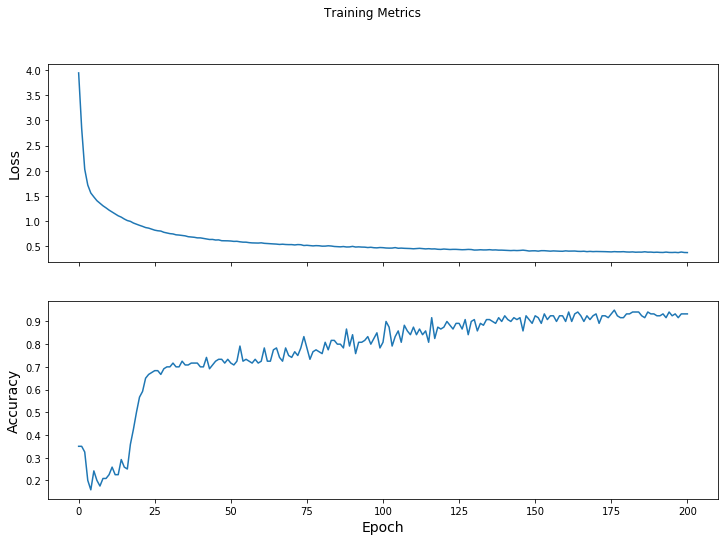

In [21]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [22]:
## Evaluate on test set

test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

In [23]:
test_df = pd.read_csv(test_fp)
test_dataset = tf.data.Dataset.from_tensor_slices((test_df.values[:,:-1],test_df.values[:,-1]))
test_dataset = test_dataset.batch(batch_size)

In [24]:
## Compute test accuracy
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 93.333%


In [25]:
## Last batch actual labels and predicted
print("\n".join(f"actual: {a} =? pred: {b}" for a,b in zip(y,prediction)))

actual: 1.0 =? pred: 1
actual: 2.0 =? pred: 2
actual: 0.0 =? pred: 0
actual: 1.0 =? pred: 1
actual: 1.0 =? pred: 1
actual: 1.0 =? pred: 1
actual: 0.0 =? pred: 0
actual: 2.0 =? pred: 2
actual: 1.0 =? pred: 1
actual: 2.0 =? pred: 2
actual: 2.0 =? pred: 2
actual: 0.0 =? pred: 0
actual: 2.0 =? pred: 2
actual: 1.0 =? pred: 1
actual: 1.0 =? pred: 1
actual: 0.0 =? pred: 0
actual: 1.0 =? pred: 1
actual: 0.0 =? pred: 0
actual: 0.0 =? pred: 0
actual: 2.0 =? pred: 2
actual: 0.0 =? pred: 0
actual: 1.0 =? pred: 2
actual: 2.0 =? pred: 2
actual: 1.0 =? pred: 2
actual: 1.0 =? pred: 1
actual: 1.0 =? pred: 1
actual: 0.0 =? pred: 0
actual: 1.0 =? pred: 1
actual: 2.0 =? pred: 2
actual: 1.0 =? pred: 1
